In [91]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#creating a start date and end date
start = '2017-01-01'
end =  datetime.today().strftime("%Y-%m-%d")
#end = '2019-12-31'

#creating the dataframe
df= data.DataReader('TSLA', 'yahoo', start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2017-01-03  14.688667  14.064000  14.324000  14.466000   88849500.0  14.466000
2017-01-04  15.200000  14.287333  14.316667  15.132667  168202500.0  15.132667
2017-01-05  15.165333  14.796667  15.094667  15.116667   88675500.0  15.116667
2017-01-06  15.354000  15.030000  15.128667  15.267333   82918500.0  15.267333
2017-01-09  15.461333  15.200000  15.264667  15.418667   59692500.0  15.418667
                  High         Low        Open       Close       Volume  \
Date                                                                      
2022-11-30  194.759995  180.630005  182.429993  194.699997  109186400.0   
2022-12-01  198.919998  191.800003  197.080002  194.699997   80046200.0   
2022-12-02  196.250000  191.110001  191.779999  194.860001   73533400.0   
2022-12-05  191.270004  180.550003  189.440002  182.449997   93122700.0 

(1493, 6)

Empty DataFrame
Columns: [High, Low, Open, Close, Volume, Adj Close]
Index: []
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1493 entries, 2017-01-03 to 2022-12-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1493 non-null   float64
 1   Low        1493 non-null   float64
 2   Open       1493 non-null   float64
 3   Close      1493 non-null   float64
 4   Volume     1493 non-null   float64
 5   Adj Close  1493 non-null   float64
dtypes: float64(6)
memory usage: 81.6 KB
(1493, 6)


<AxesSubplot: xlabel='Date'>

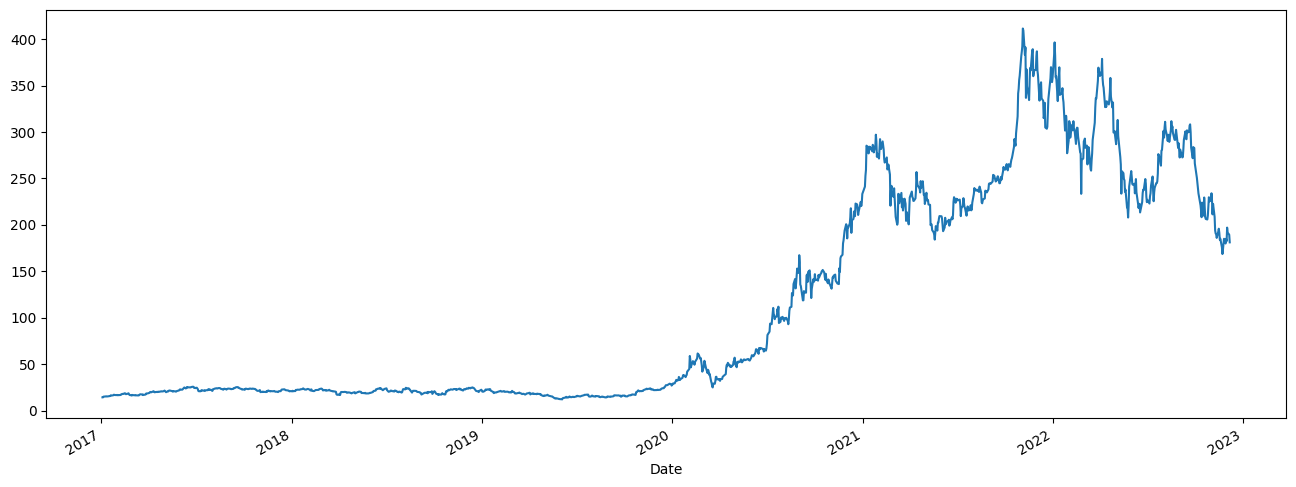

In [92]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
df.info()
print(df.shape)

df['Open'].plot(figsize=(16,6))

In [93]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
df = df.reset_index()
df.head()
df = df.drop(['Adj Close'], axis=1)
df.head()

,Date,High,Low,Open,Close,Volume
0,2017-01-03,14.688667,14.064000,14.324000,14.466000,88849500.0
1,2017-01-04,15.200000,14.287333,14.316667,15.132667,168202500.0
2,2017-01-05,15.165333,14.796667,15.094667,15.116667,88675500.0
3,2017-01-06,15.354000,15.030000,15.128667,15.267333,82918500.0
4,2017-01-09,15.461333,15.200000,15.264667,15.418667,59692500.0


In [94]:
#seperate the data into train and test data

train_headers = ['High','Low', 'Open','Volume']
target_headers = ['Close']

x = df[train_headers]
y = df[target_headers]

print(x.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =1)

print(X_train.shape)
print(X_test.shape)

(1493, 4)
(1493, 1)
(1045, 4)
(448, 4)


In [95]:
# setting up the Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
rgr = LinearRegression()
rgr.fit(X_train, y_train)

#getting the coefficient and intercept of the model
print('The coefficient of the model is ',rgr.coef_)
print('The intercept of the model is ',rgr.intercept_)

The coefficient of the model is  [[ 8.62270413e-01  8.02944084e-01 -6.66085143e-01  6.09144735e-10]]
The intercept of the model is  [-0.02298648]


In [96]:

#predict the model
y_pred = rgr.predict(X_test)
print(y_pred)
print(y_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

[[ 21.04498463]
 [ 23.81795854]
 [ 23.80573022]
 [219.18953873]
 [ 19.46567085]
 [ 21.08425328]
 [233.98958035]
 [ 15.23183729]
 [149.72379145]
 [ 20.56788619]
 [ 23.03036477]
 [236.83149248]
 [228.81829953]
 [214.7074442 ]
 [ 19.85649684]
 [309.18124759]
 [292.84123421]
 [ 20.13765306]
 [221.91958497]
 [ 19.91230241]
 [ 21.5931642 ]
 [250.9042253 ]
 [286.22747036]
 [197.93607025]
 [ 22.34063364]
 [ 22.48360182]
 [ 19.30129096]
 [ 35.69715145]
 [ 22.94288753]
 [ 16.72449058]
 [ 24.27956835]
 [ 22.57003974]
 [ 17.72518179]
 [ 17.69580032]
 [235.7086261 ]
 [ 98.70252112]
 [ 21.37052434]
 [ 16.29317523]
 [ 16.98619104]
 [ 25.60541688]
 [ 16.82682733]
 [ 24.99922415]
 [ 22.15255325]
 [ 23.01708604]
 [ 14.47937368]
 [ 17.14141128]
 [252.12413236]
 [288.36473087]
 [ 18.86822045]
 [292.8923195 ]
 [244.50401878]
 [ 62.66259085]
 [255.75774556]
 [ 22.74830323]
 [136.5337149 ]
 [ 18.77770536]
 [224.95649362]
 [ 22.47454555]
 [295.19056926]
 [305.8486638 ]
 [279.41307047]
 [312.20824945]
 [145.19

Creating a new dataframe for the actual price and the new predicted price

In [97]:
#df1 = pd.DataFrame({"Actual Price": [y_test], "Predicted Price": [y_pred]})
df1 = {'Actual Price': [y_test], 'Predicted Price': [y_pred]}
new_data = pd.DataFrame(df1)
print(new_data)
#print(df1.head(10))

                                        Actual Price  \
0             Close
91     21.058666
288    23.82...   

                                     Predicted Price  
0  [[21.044984630989966], [23.817958538509906], [...  


In [98]:
rgr.predict([[259.06, 263.2800, 254.5376, 6189026]])

C:\Users\dagbo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[265.2159615]])